# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Muhammad Faqih Maulana
- **Email:** faqhmlna@gmail.com
- **ID Dicoding:** faqhmlna

## Menentukan Pertanyaan Bisnis

- Bagaimana Hubungan Cuaca dalam Aktivitas Penyewaan Sepeda?
- Musim mana yang memiliki jumlah penyewaaan terbanyak?
- Bulan mana yang memiliki jumlah penyewaan terbanyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import Dataset dan Menampilkan 5 Baris Pertama (Day)
day_df = pd.read_csv("https://raw.githubusercontent.com/faqhmlna0/bike_dataset/main/Bike%20Sharing%20Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Import Dataset dan Menampilkan 5 Baris Pertama (Hour)
hour_df = pd.read_csv("https://raw.githubusercontent.com/faqhmlna0/bike_dataset/main/Bike%20Sharing%20Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [7]:
# Menilai Data day_df
day_df.info()

#dteday --> datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# Memeriksa Duplikasi pada Data day_df
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


In [9]:
# Memeriksa Parameter Statistik pada Data day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
# Menilai Data hour_df
hour_df.info()

#dteday --> datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
# Memeriksa Duplikasi pada Data hour_df
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())

Jumlah Duplikasi:  0


In [12]:
# Memeriksa Parameter Statistik pada Data hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [13]:
# Mengganti Tipe Data dari day_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = day_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

In [14]:
# Memastikan Bahwa DataType sudah Berubah
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [15]:
# Mengubah Mengubah nama dari Data day_df

# Mengubah Nama Season
day_df.season.replace([1, 2, 3, 4], ['spring', 'summer', 'fall', 'winter'], inplace=True)

# Mengubah Nama Bulan
day_df.mnth.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Marc', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], inplace=True)

# Mengubah Nama Minggu
day_df.weekday.replace([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], inplace=True)

# Mengubah Nama Workingday
day_df.workingday.replace([0, 1], ['No', 'Yes'], inplace=True)

# Mengubah Nama Cuaca
day_df.weathersit.replace([1, 2, 3, 4], ['Clear', 'Mist', 'Light Snow', 'Heavy Rain'], inplace=True)

# Mengubah Nama Tahun
day_df.yr.replace([0, 1], [2011, 2012], inplace=True)

# Mengubah Nama Holiday
day_df.holiday.replace([0, 1], ['No', 'Yes'], inplace=True)

In [16]:
# Mengganti Nama Nama Singkatan Menjadi Kepanjangan dari Data day_df
day_df.rename(columns={
    "dteday": "date_day",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather",
    "hum": "humidity",
    "casual": "non_member",
    "registered": "member",
    "cnt": "total_count"
}, inplace=True)

day_df.head()

,instant,date_day,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,non_member,member,total_count
0,1,2011-01-01,spring,2011,Jan,No,Sat,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,Jan,No,Sun,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,Jan,No,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,Jan,No,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,Jan,No,Wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
# Menghilangkan Kolom yang Tidak Diperlukan pada day_df
day_df = day_df.drop("instant", axis=1)
day_df.head()

,date_day,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,non_member,member,total_count
0,2011-01-01,spring,2011,Jan,No,Sat,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,spring,2011,Jan,No,Sun,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,spring,2011,Jan,No,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,spring,2011,Jan,No,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,spring,2011,Jan,No,Wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
# Mengganti Tipe Data dari hour_df
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['season'] = hour_df.season.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

In [19]:
# Memastikan Bahwa DataType sudah Berubah
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [20]:
# Mengubah Mengubah nama dari Data hour_df

# Mengubah Nama Season
hour_df.season.replace([1, 2, 3, 4], ['spring', 'summer', 'fall', 'winter'], inplace=True)

# Mengubah Nama Bulan
hour_df.mnth.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Marc', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], inplace=True)

# Mengubah Nama Minggu
hour_df.weekday.replace([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], inplace=True)

# Mengubah Nama Workingday
hour_df.workingday.replace([0, 1], ['No', 'Yes'], inplace=True)

# Mengubah Nama Cuaca
hour_df.weathersit.replace([1, 2, 3, 4], ['Clear', 'Mist', 'Light Snow', 'Heavy Rain'], inplace=True)

# Mengubah Nama Tahun
hour_df.yr.replace([0, 1], [2011, 2012], inplace=True)

# Mengubah Nama Holiday
hour_df.holiday.replace([0, 1], ['No', 'Yes'], inplace=True)

In [21]:
# Mengganti Nama Nama Singkatan Menjadi Kepanjangan dari Data hour_df
hour_df.rename(columns={
    "dteday": "date_day",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather",
    "hum": "humidity",
    "casual": "non_member",
    "registered": "member",
    "cnt": "total_count",
    "hr": "hour"
}, inplace=True)

hour_df.head()

,instant,date_day,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,non_member,member,total_count
0,1,2011-01-01,spring,2011,Jan,0,No,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,Jan,1,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,Jan,2,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,Jan,3,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,Jan,4,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
# Menghilangkan Kolom yang Tidak Diperlukan pada hour_df
hour_df = hour_df.drop("instant", axis=1)
hour_df.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,non_member,member,total_count
0,2011-01-01,spring,2011,Jan,0,No,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,spring,2011,Jan,1,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,spring,2011,Jan,2,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,spring,2011,Jan,3,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,spring,2011,Jan,4,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
# Menggabungkan Data dari day_df dengan hour_df
bike_dataset = day_df.merge(hour_df, on='date_day', how='inner', suffixes=('_daily', '_hourly'))
bike_dataset.head()

,date_day,season_daily,year_daily,month_daily,holiday_daily,weekday_daily,workingday_daily,weather_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weather_hourly,temp_hourly,atemp_hourly,humidity_hourly,windspeed_hourly,non_member_hourly,member_hourly,total_count_hourly
0,2011-01-01,spring,2011,Jan,No,Sat,No,Mist,0.344167,0.363625,...,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,spring,2011,Jan,No,Sat,No,Mist,0.344167,0.363625,...,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,spring,2011,Jan,No,Sat,No,Mist,0.344167,0.363625,...,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,spring,2011,Jan,No,Sat,No,Mist,0.344167,0.363625,...,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,spring,2011,Jan,No,Sat,No,Mist,0.344167,0.363625,...,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [24]:
# Melihat Mean dan Total Bikes per Tahun
bike_dataset.groupby(by="year_daily").agg({
    "total_count_hourly": ["sum", "mean"]
})

total_count_hourly            
                          sum        mean
year_daily                               
2011                  1243103  143.794448
2012                  2049576  234.666361

In [25]:
# Melihat User Sepeda Berdasarkan Musim
bike_dataset.groupby(by="season_daily").agg({
    "total_count_hourly": ["sum", "mean", "max", "min"]
})

<ipython-input-25-201029449051>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_dataset.groupby(by="season_daily").agg({


total_count_hourly                     
                            sum        mean  max min
season_daily                                        
spring                   471348  111.114569  801   1
summer                   918589  208.344069  957   1
fall                    1061129  236.016237  977   1
winter                   841613  198.868856  967   1

In [26]:
# Melihat User Sepeda Berdasarkan Bulan
bike_dataset.groupby(by="month_daily").agg({
    "total_count_hourly": ["sum", "mean", "max", "min", "std"]
})

<ipython-input-26-3cd173e68fdc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_dataset.groupby(by="month_daily").agg({


total_count_hourly                                 
                           sum        mean  max min         std
month_daily                                                    
Jan                     134933   94.424773  559   1   99.907146
Feb                     151352  112.865026  610   1  112.486565
Marc                    228920  155.410726  957   1  163.543050
Apr                     269094  187.260960  822   1  181.137902
May                     331686  222.907258  873   1  187.721497
Jun                     346342  240.515278  900   1  196.038950
Jul                     344948  231.819892  913   1  187.483806
Aug                     351194  238.097627  941   1  200.444648
Sept                    345991  240.773138  977   1  214.609531
Oct                     322352  222.158511  963   1  203.477057
Nov                     254831  177.335421  729   1  158.973887
Dec                     211036  142.303439  759   1  141.080674

In [27]:
# Melihat User Sepeda Berdasarkan Weekday
bike_dataset.groupby(by="weekday_daily").agg({
    "total_count_hourly": ["sum", "mean", "max", "min", "std"]
})

<ipython-input-27-878246695dd8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_dataset.groupby(by="weekday_daily").agg({


total_count_hourly                                 
                             sum        mean  max min         std
weekday_daily                                                    
Sun                       444027  177.468825  776   1  168.167710
Mon                       455503  183.744655  968   1  179.514167
Tue                       469109  191.238891  970   1  187.820480
Wed                       473048  191.130505  977   1  190.894464
Thu                       485395  196.436665  976   1  188.011923
Fri                       487790  196.135907  957   1  174.076894
Sat                       477807  190.209793  783   1  179.820569

In [28]:
# Melihat User Sepeda Berdasarkan Member/Non_Member
bike_dataset.groupby(by="year_daily").agg({
    "non_member_hourly": ["mean"],
    "member_hourly": ["mean"]
})

,non_member_hourly,member_hourly
,mean,mean
year_daily,,
2011,28.600578,115.193869
2012,42.679757,191.986604


In [29]:
# Melihat User Sepeda Berdasarkan Tahun dan Bulan
bike_dataset.groupby(by=["year_daily", "month_daily"]).agg({
    "total_count_hourly": ["mean"]
})

<ipython-input-29-3fd60f4aa19b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_dataset.groupby(by=["year_daily", "month_daily"]).agg({


total_count_hourly
                                     mean
year_daily month_daily                   
2011       Jan                  55.507267
           Feb                  74.291217
           Marc                 87.732877
           Apr                 131.947149
           May                 182.555108
           Jun                 199.322222
           Jul                 189.974462
           Aug                 186.991792
           Sept                177.709902
           Oct                 166.232840
           Nov                 142.095967
           Dec                 117.844804
2012       Jan                 130.558704
           Feb                 149.041908
           Marc                221.904441
           Apr                 242.651811
           May                 263.259409
           Jun                 281.708333
           Jul                 273.665323
           Aug                 288.310484
           Sept                303.573611
           Oct                 280.848870
           Nov                 212.623955
           Dec                 166.729111

In [30]:
# Melihat User Sepeda Berdasarkan Cuaca
bike_dataset.groupby(by=["weather_daily"]).agg({
    "non_member_hourly": ["mean"],
    "member_hourly": ["mean"],
    "total_count_hourly": ["mean", "sum"]
})

<ipython-input-30-4800989cbf69>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_dataset.groupby(by=["weather_daily"]).agg({


non_member_hourly member_hourly total_count_hourly         
                           mean          mean               mean      sum
weather_daily                                                            
Clear                 40.429891    164.094746         204.524638  2257952
Mist                  28.917731    140.875830         169.793562   996858
Light Snow             8.322650     72.594017          80.916667    37869

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [31]:
weatherly_summary = bike_dataset.groupby("weather_daily").agg({
    "non_member_hourly": "sum",
    "member_hourly": "sum",
    "total_count_hourly": "sum"
}).reset_index()

weatherly_summary

<ipython-input-31-d595ba7034a1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weatherly_summary = bike_dataset.groupby("weather_daily").agg({


,weather_daily,non_member_hourly,member_hourly,total_count_hourly
0,Clear,446346,1811606,2257952
1,Mist,169776,827082,996858
2,Light Snow,3895,33974,37869


<ipython-input-32-fa6f2c91cc07>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weather_daily", y="total_count_hourly", data=weatherly_summary, palette=colors)
<ipython-input-32-fa6f2c91cc07>:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x="weather_daily", y="total_count_hourly", data=weatherly_summary, palette=colors)


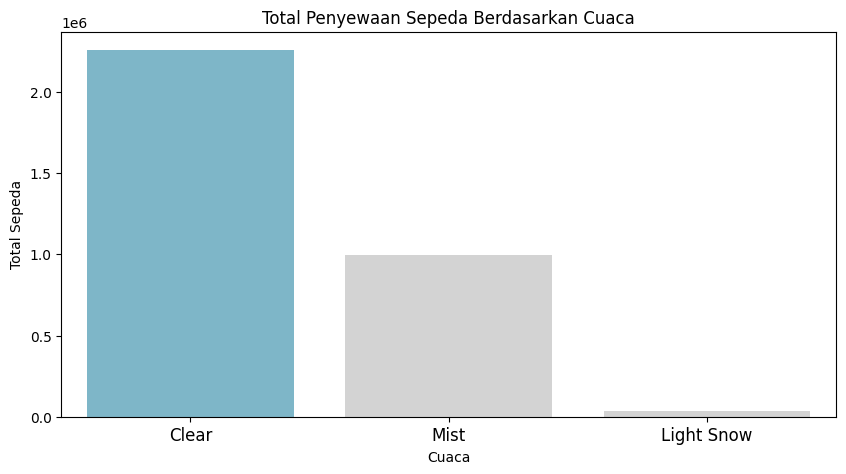

In [32]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="weather_daily", y="total_count_hourly", data=weatherly_summary, palette=colors)
plt.title("Total Penyewaan Sepeda Berdasarkan Cuaca")
plt.xlabel("Cuaca")
plt.ylabel("Total Sepeda")
plt.tick_params(axis='x', labelsize=12)

plt.show()

### Pertanyaan 2:

In [33]:
seasonly_data = bike_dataset.groupby("season_daily", observed=False).agg({
    "non_member_hourly": "mean",
    "member_hourly": "mean",
    "total_count_hourly": "mean"
})
seasonly_data.head()

,non_member_hourly,member_hourly,total_count_hourly
season_daily,,,
spring,14.290901,96.823668,111.114569
summer,46.160581,162.183488,208.344069
fall,50.287144,185.729093,236.016237
winter,30.666824,168.202032,198.868856


<ipython-input-34-d772994ba0c0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season_daily", y="total_count_hourly", data=seasonly_data.sort_values(by="total_count_hourly", ascending=False), palette=colors)


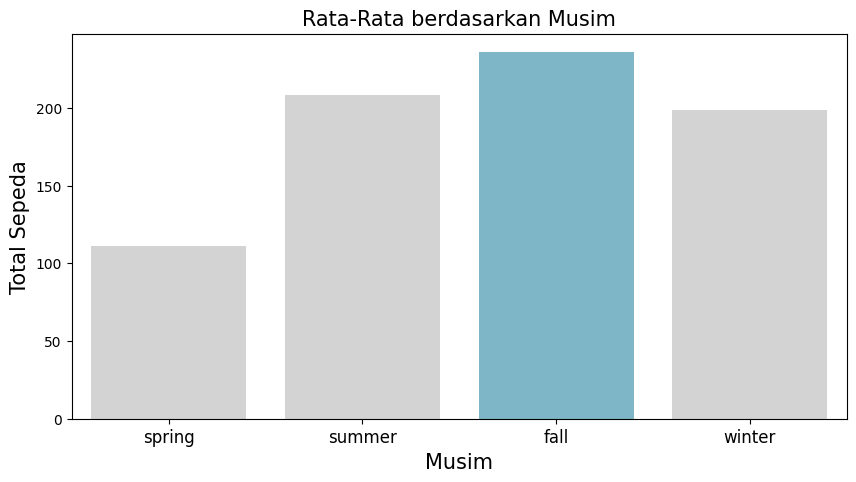

In [34]:
plt.figure(figsize=(10, 5))

colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

sns.barplot(x="season_daily", y="total_count_hourly", data=seasonly_data.sort_values(by="total_count_hourly", ascending=False), palette=colors)

plt.title("Rata-Rata berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel("Total Sepeda", loc="center", fontsize=15)
plt.xlabel("Musim", loc="center", fontsize=15)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3:

In [35]:
bike_dataset.groupby(by="month_daily", observed=False).agg({
    "total_count_hourly": ["sum", "mean", "max", "min", "std"]
})

total_count_hourly                                 
                           sum        mean  max min         std
month_daily                                                    
Jan                     134933   94.424773  559   1   99.907146
Feb                     151352  112.865026  610   1  112.486565
Marc                    228920  155.410726  957   1  163.543050
Apr                     269094  187.260960  822   1  181.137902
May                     331686  222.907258  873   1  187.721497
Jun                     346342  240.515278  900   1  196.038950
Jul                     344948  231.819892  913   1  187.483806
Aug                     351194  238.097627  941   1  200.444648
Sept                    345991  240.773138  977   1  214.609531
Oct                     322352  222.158511  963   1  203.477057
Nov                     254831  177.335421  729   1  158.973887
Dec                     211036  142.303439  759   1  141.080674

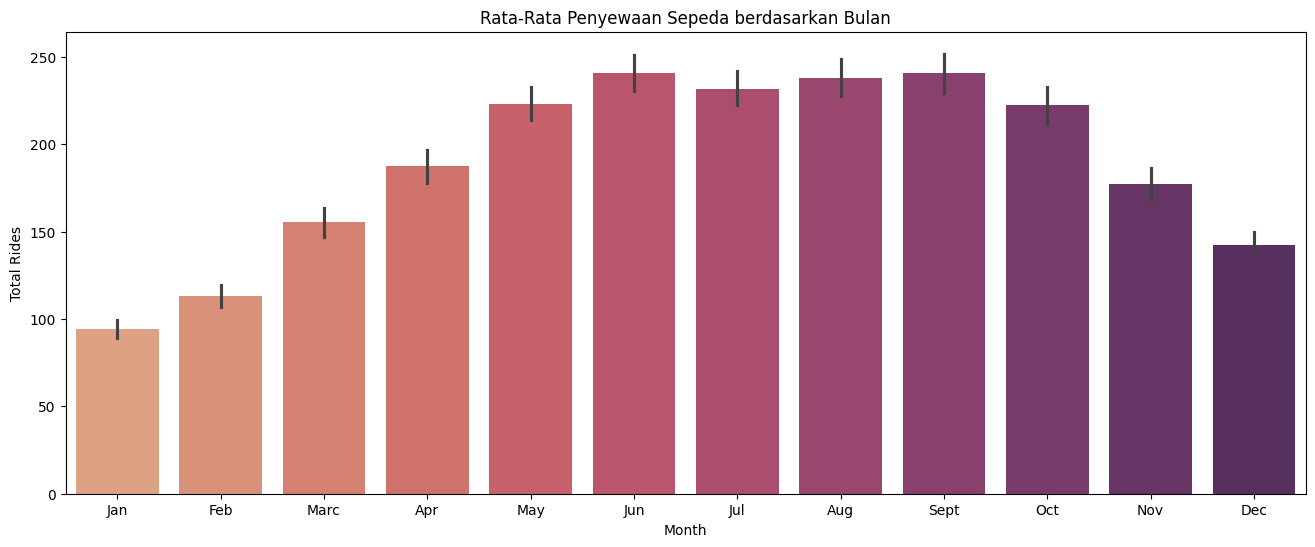

In [36]:
plt.figure(figsize=(16,6))

sns.barplot(
    x="month_daily",
    y="total_count_hourly",
    hue="month_daily",
    data=bike_dataset,
    palette="flare"
)


plt.title("Rata-Rata Penyewaan Sepeda berdasarkan Bulan")
plt.xlabel("Month")
plt.ylabel("Total Rides")

plt.show()

## Conclusion

- Bagaimana Pengaruh Cuaca dalam Aktivitas Penyewaan Sepeda?
> Cuaca juga mempengaruhi tingkat penyewaan sepeda, cuaca clear menjadi yang favorite dibandingkan cuaca yang lain.

- Musim mana yang memiliki jumlah penyewaaan terbanyak?
> Musim sangat mempengaruhi penyewaan sepeda, dapat dilihat bahwa orang lebih menyukai menyewa sepeda pada musim gugur dibandingkan musim yang lain

- Bulan dengan jumlah penyewaan terbanyak?
> Bulan September memegang rata rata terbanyak sedangkan bulan agustus memegang akumulasi terbanyak


In [37]:
# Menyimpan Data ke Drive
bike_dataset.to_csv("bike_dataset_data.csv", index=False)